##Imports and Conection with GDrive

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import seaborn as sns

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/content/drive/MyDrive/')
# método em Python usado para alterar o diretório de trabalho atual para o caminho especificado.
path = "/content/drive/MyDrive/Iniciacao_cientifica/"
os.chdir(path)
import shutil
shutil.copy('/content/drive/MyDrive/Iniciacao_cientifica/out.csv', '/content/')

Mounted at /content/drive


'/content/out.csv'

##Read Dataset csv as dataframe

In [212]:
# Carregando o arquivo CSV
df = pd.read_csv('/content/out.csv')


<ipython-input-212-f22845693347>:2: DtypeWarning: Columns (7,73,74,75,76,77,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/out.csv')


In [4]:
#List columns ImprovMLCQ
df.columns.values


array(['Unnamed: 0.1', 'commit_hash', 'start_line', 'end_line', 'smell',
       'id', 'reviewer_id', 'sample_id', 'severity', 'longmethod_label',
       'featureenvy_label', 'dataclass_label', 'blob_label',
       'agreement_experts', 'agreement_smell_type', 'agreement_smell',
       'system_name', 'review_timestamp', 'type', 'code_name',
       'repository', 'path', 'link', 'is_from_industry_relevant_project',
       'weighted_average', 'qtd_rewier_id', 'Organic_fileRelativePath',
       'Organic_startLine', 'Organic_endLine', 'Organic_WeighOfClass',
       'Organic_NumberOfAccessorMethods',
       'Organic_ClassEffectiveLinesOfCode', 'Organic_LCOM3',
       'Organic_TightClassCohesion', 'Organic_IsAbstract',
       'Organic_PublicFieldCount', 'Organic_OverrideRatio',
       'Organic_WeightedMethodCount', 'smell_Organic',
       'Organic_smellReason', 'Organic_ChangingMethods',
       'Organic_NumberOfTryStatements', 'Organic_MaxNesting',
       'Organic_NumberOfFinallyStatements',
  

In [59]:
tool = ['Organic', 'PMD', 'Designite']
smell = ['longmethod', 'featureenvy', 'dataclass', 'blob']

df_result = df.copy()

###Agglomeration vs tool agreement smell type



In [60]:
df_agglomeration = pd.DataFrame()

df_agglomeration['Aglomeration'] = ['MLCQ', 'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']

df_hasSmell = df_result[['longmethod_label', #'featureenvy_label', 'dataclass_label', 'blob_label',
                         'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["longmethod_label"] == 1)]
df_agglomeration['longmethod'] = df_hasSmell.sum().values

df_hasSmell = df_result[['featureenvy_label', #'dataclass_label', 'blob_label',
                         'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["featureenvy_label"] == 1)]
df_agglomeration['featureenvy'] = df_hasSmell.sum().values

df_hasSmell = df_result[['dataclass_label', #'blob_label',
                         'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["dataclass_label"] == 1)]
df_agglomeration['dataclass'] = df_hasSmell.sum().values

df_hasSmell = df_result[['blob_label',
                         'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["blob_label"] == 1)]
df_agglomeration['blob'] = df_hasSmell.sum().values

# set the 'Aglomeration' column as index
df_agglomeration.set_index('Aglomeration', inplace=True)
df_agglomeration = df_agglomeration.T
df_agglomeration


Aglomeration,MLCQ,smell_Organic_aglomeration,smell_PMD_aglomeration,smell_Designite_aglomeration
longmethod,1170,74,246,569
featureenvy,1131,53,127,506
dataclass,2022,50,606,1288
blob,2127,86,1003,1344


In [67]:
def percentage(df_agglomeration):
  # Calculating Percentage
  tool = ['Organic', 'PMD', 'Designite']
  for i in tool:
    df_agglomeration['smell_'+i+'_aglomeration'] = round((df_agglomeration['smell_'+i+'_aglomeration'] * 100) / df_agglomeration['MLCQ'])

  df_agglomeration = df_agglomeration[['smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]

  return df_agglomeration

# Função para adicionar uma string antes e depois de cada valor
def add_string(value):
    return ' (' + str(value) + ')'

In [62]:
df_agglomeration_perc = df_agglomeration.copy()
df_agglomeration_perc = percentage(df_agglomeration_perc)

# Add '%' to integer values in the DataFrame
df_agglom_agreement = df_agglomeration_perc.applymap(lambda x: str(round(x)) + '\%' if isinstance(x, float) else x)

# Aplicar a função a todos os elementos do DataFrame
df_agglom_agreement = df_agglom_agreement.applymap(add_string)

df_agglom_agreement.insert(0, 'MLCQ', ['','','',''])
# Converter todos os campos do DataFrame em strings
df_agglomeration_str = df_agglomeration.astype(str)
df_agglom_agreement = df_agglom_agreement.astype(str)

# # Somar os dois DataFrames
merged_df = df_agglomeration_str + df_agglom_agreement
merged_df = merged_df[['MLCQ', 'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]

# Redefinir os nomes das colunas
novos_nomes = ['MLCQ', 'Organic', 'PMD', 'Designite']
merged_df.columns = novos_nomes

merged_df = merged_df.T

# Redefinir os nomes das colunas
novos_nomes = ['LM', 'FE', 'DC', 'Blob']
merged_df.columns = novos_nomes

display(merged_df)
# Convert DataFrame to LaTeX
latex_table = merged_df.to_latex(index=True)
# Print the LaTeX table
print(latex_table)

,LM,FE,DC,Blob
MLCQ,1170,1131,2022,2127
Organic,74 (6\%),53 (5\%),50 (2\%),86 (4\%)
PMD,246 (21\%),127 (11\%),606 (30\%),1003 (47\%)
Designite,569 (49\%),506 (45\%),1288 (64\%),1344 (63\%)


\begin{tabular}{lllll}
\toprule
 & LM & FE & DC & Blob \\
\midrule
MLCQ & 1170 & 1131 & 2022 & 2127 \\
Organic & 74 (6\%) & 53 (5\%) & 50 (2\%) & 86 (4\%) \\
PMD & 246 (21\%) & 127 (11\%) & 606 (30\%) & 1003 (47\%) \\
Designite & 569 (49\%) & 506 (45\%) & 1288 (64\%) & 1344 (63\%) \\
\bottomrule
\end{tabular}



Text(0.5, 1.0, 'Code smell per tool')

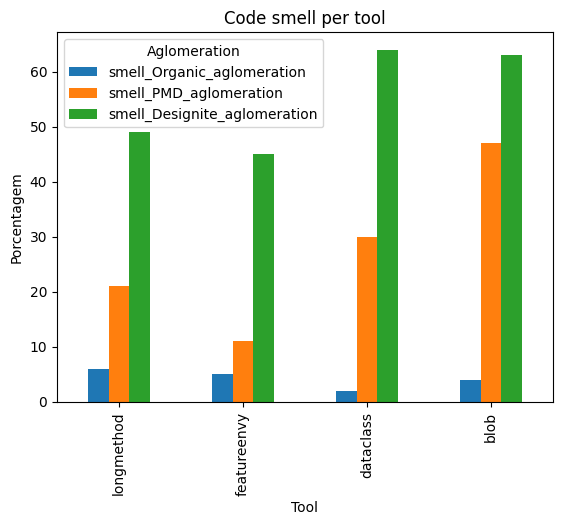

In [54]:
ax = df_agglomeration_perc.plot(kind='bar', stacked=False,
        title='Stacked Bar Graph by dataframe')
#ax = df_graph.plot(x='index', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')

ax.set_xlabel("Tool")
ax.set_ylabel("Porcentagem")
ax.set_title("Code smell per tool")

###Agglomeration vs tool agreement per severity

In [86]:
df_agglomeration = pd.DataFrame()
num_severity = []

df_agglomeration['Aglomeration'] = ['MLCQ', 'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']

df_hasSmell = df_result[['severity', #'featureenvy_label', 'dataclass_label', 'blob_label',
                         'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["severity"] == 'critical')]
df_agglomeration['critical'] = df_hasSmell.sum().values
#print(df_hasSmell[(df_hasSmell["severity"] == 'critical')].count().values)
num_severity.append(df_hasSmell.shape[0])


df_hasSmell = df_result[['severity', #'dataclass_label', 'blob_label',
                         'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["severity"] == 'major')]
df_agglomeration['major'] = df_hasSmell.sum().values
num_severity.append(df_hasSmell.shape[0])

df_hasSmell = df_result[['severity', #'blob_label',
                         'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["severity"] == 'minor')]
df_agglomeration['minor'] = df_hasSmell.sum().values
num_severity.append(df_hasSmell.shape[0])

df_hasSmell = df_result[['severity',
                         'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["severity"] == 'none')]
df_agglomeration['none'] = df_hasSmell.sum().values
num_severity.append(df_hasSmell.shape[0])

# set the 'Aglomeration' column as index
df_agglomeration.set_index('Aglomeration', inplace=True)
df_agglomeration = df_agglomeration.T

# Remove the column 'MLCQ' from the DataFrame
df_agglomeration = df_agglomeration.drop(df_agglomeration.columns[0], axis=1)
df_agglomeration.insert(0, 'MLCQ', num_severity)

df_agglomeration

Aglomeration,MLCQ,smell_Organic_aglomeration,smell_PMD_aglomeration,smell_Designite_aglomeration
critical,487,37,205,317
major,1359,85,437,820
minor,2220,73,661,1225
none,13767,270,1967,7184


In [87]:
def percentage(df_agg_percent):
  # Calculating Percentage
  tool = ['Organic', 'PMD', 'Designite']
  for i in tool:
    df_agg_percent['smell_'+i+'_aglomeration'] = (df_agg_percent['smell_'+i+'_aglomeration'] * 100) / df_agg_percent['MLCQ']
  return df_agg_percent

In [88]:
df_agg_percent = df_agglomeration.copy()
df_agg_percent = percentage(df_agg_percent)
df_agg_percent = df_agg_percent[['smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]

# Add '%' to integer values in the DataFrame
df_agglom_agreement = df_agg_percent.applymap(lambda x: str(round(x)) + '\%' if isinstance(x, float) else x)
# Aplicar a função a todos os elementos do DataFrame
df_agglom_agreement = df_agglom_agreement.applymap(add_string)

df_agglom_agreement.insert(0, 'MLCQ', ['','','',''])
# Converter todos os campos do DataFrame em strings
df_agglomeration_str = df_agglomeration.astype(str)
df_agglom_agreement = df_agglom_agreement.astype(str)

# Somar os dois DataFrames
merged_df = df_agglomeration_str + df_agglom_agreement
merged_df = merged_df[['MLCQ', 'smell_Organic_aglomeration', 'smell_PMD_aglomeration', 'smell_Designite_aglomeration']]

# Redefinir os nomes das colunas
novos_nomes = ['MLCQ', 'Organic', 'PMD', 'Designite']
merged_df.columns = novos_nomes

merged_df = merged_df.T

# Redefinir os nomes das colunas
# novos_nomes = ['LM', 'FE', 'DC', 'Blob']
# merged_df.columns = novos_nomes

display(merged_df)
# Convert DataFrame to LaTeX
latex_table = merged_df.to_latex(index=True)
# Print the LaTeX table
print(latex_table)

,critical,major,minor,none
MLCQ,487,1359,2220,13767
Organic,37 (8\%),85 (6\%),73 (3\%),270 (2\%)
PMD,205 (42\%),437 (32\%),661 (30\%),1967 (14\%)
Designite,317 (65\%),820 (60\%),1225 (55\%),7184 (52\%)


\begin{tabular}{lllll}
\toprule
 & critical & major & minor & none \\
\midrule
MLCQ & 487 & 1359 & 2220 & 13767 \\
Organic & 37 (8\%) & 85 (6\%) & 73 (3\%) & 270 (2\%) \\
PMD & 205 (42\%) & 437 (32\%) & 661 (30\%) & 1967 (14\%) \\
Designite & 317 (65\%) & 820 (60\%) & 1225 (55\%) & 7184 (52\%) \\
\bottomrule
\end{tabular}



###Correlation severity with agglomeration

In [91]:
#Map string for the column severity to integer
codes = {'critical': 3, 'major': 2, 'minor': 1, 'none': 0}
df['severity'] = df['severity'].map(codes)
df_result = df

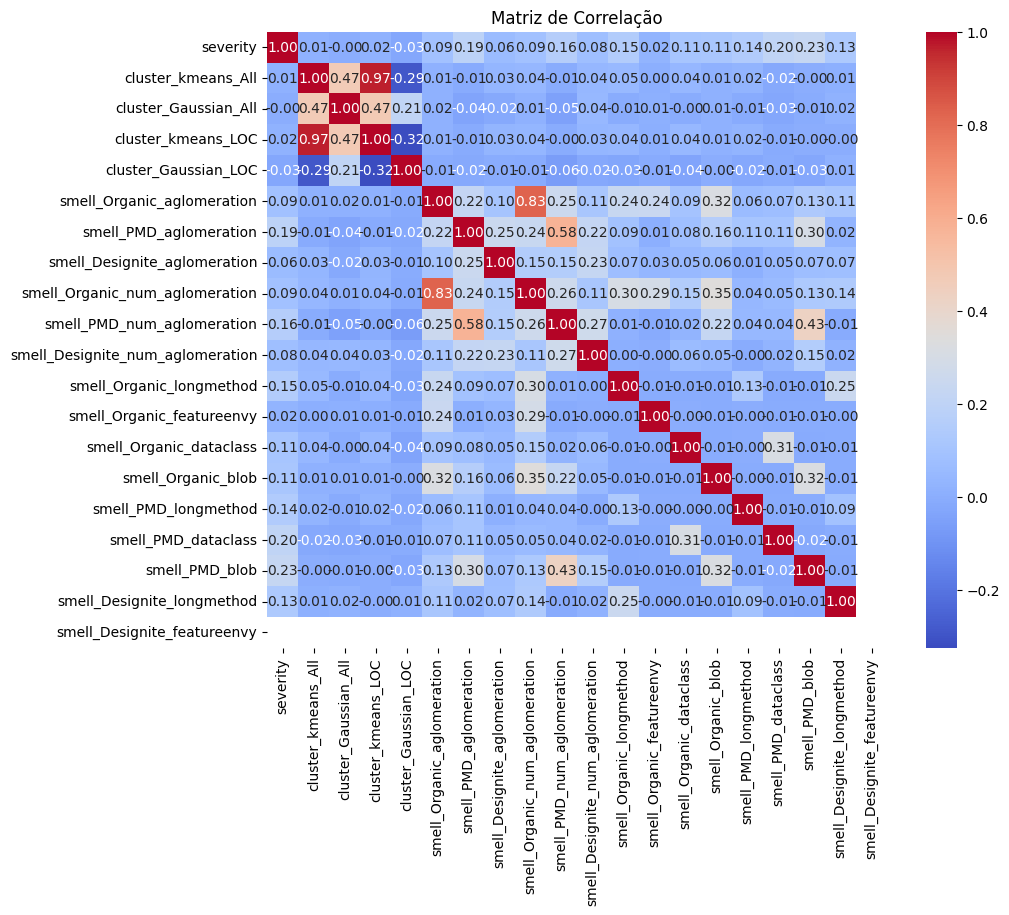

In [95]:
df_corr = df_result[['severity', 'cluster_kmeans_All',
       'cluster_Gaussian_All', 'cluster_kmeans_LOC',
       'cluster_Gaussian_LOC',
       'smell_Organic_aglomeration', 'smell_PMD_aglomeration',
       'smell_Designite_aglomeration', 'smell_Organic_num_aglomeration',
       'smell_PMD_num_aglomeration', 'smell_Designite_num_aglomeration',
       'smell_Organic_longmethod', 'smell_Organic_featureenvy',
       'smell_Organic_dataclass', 'smell_Organic_blob',
       'smell_PMD_longmethod',
       'smell_PMD_dataclass', 'smell_PMD_blob',
       'smell_Designite_longmethod', 'smell_Designite_featureenvy']] #, 'background']]

# Calcular a correlação entre os campos
correlation_matrix = df_corr.corr()

# Cria o mapa de calor usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [207]:
from sklearn.preprocessing import LabelEncoder

df_corr = df_result[['severity', 'longmethod_label',
       'featureenvy_label', 'dataclass_label', 'blob_label',
       'smell_Designite_num_aglomeration', 'Designite_implementation Smell', 'Designite_Design Smell']].copy() #, 'Designite_Cause of the Smell']]
# Remover todas as linhas com valores NaN
#df_sem_nan = df_corr.dropna()

df_has_smell = pd.DataFrame()
df_has_no_smell = pd.DataFrame()
for j in smell:
  # Filtrar todas as colunas onde o valor na coluna 'severity' é 3
  #df_filtrado = df_corr.query('(severity == 3 | severity == 2 | severity == 1) & dataclass_label == 1 & smell_Designite_num_aglomeration > 3')
  has_none = df_corr.query('(severity == 3 | severity == 2 | severity == 1) & '+j+'_label == 1 & smell_Designite_num_aglomeration == 0')
  has_sing = df_corr.query('(severity == 3 | severity == 2 | severity == 1) & '+j+'_label == 1 & smell_Designite_num_aglomeration == 1')
  has_agg = df_corr.query('(severity == 3 | severity == 2 | severity == 1) & '+j+'_label == 1 & smell_Designite_num_aglomeration > 1')
  sum_has = len(has_none) + len(has_sing) + len(has_agg)

  # Filtrar todas as colunas onde o valor na coluna 'severity' é 3
  no_has_none = df_corr.query('(severity == 0) & '+j+'_label == 1 & smell_Designite_num_aglomeration == 0')
  no_has_sing = df_corr.query('(severity == 0) & '+j+'_label == 1 & smell_Designite_num_aglomeration == 1')
  no_has_agg = df_corr.query('(severity == 0) & '+j+'_label == 1 & smell_Designite_num_aglomeration > 1')
  sum_no_has = len(no_has_none) + len(no_has_sing) + len(no_has_agg)

  df_has_smell[''+j+''] = [len(has_none), len(has_sing), len(has_agg), sum_has]
  df_has_no_smell[''+j+''] = [len(no_has_none), len(no_has_sing), len(no_has_agg), sum_no_has]

df_has_smell = df_has_smell.T
df_has_no_smell = df_has_no_smell.T
# Redefinir os nomes das colunas
novos_nomes = ['none', 'single', 'agg', 'sum']
df_has_smell.columns = novos_nomes
df_has_no_smell.columns = novos_nomes

merged_df = merged_df.T

display(df_has_smell)
display(df_has_no_smell)


,none,single,agg,sum
longmethod,396,84,470,950
featureenvy,224,61,218,503
dataclass,381,87,838,1306
blob,397,74,836,1307


,none,single,agg,sum
longmethod,99,22,99,220
featureenvy,269,71,288,628
dataclass,209,57,450,716
blob,258,54,508,820


In [208]:
severity = ['none',	'single',	'agg']

# Calculating Percentage
def ComputePercent(df_has_smell):
  for s in severity:
    df_has_smell[''+s+''] = (df_has_smell[''+s+''] * 100) / df_has_smell['sum']
  return df_has_smell

# Função para adicionar uma string antes e depois de cada valor
def add_string(value):
  return ' (' + str(value) + ')'

In [202]:
df_has_smell_percent = df_has_smell.copy()
ComputePercent(df_has_smell_percent)
df_has_smell_percent = df_has_smell_percent[['none',	'single',	'agg']]

# Add '%' to integer values in the DataFrame
df_has_smell_percent = df_has_smell_percent.applymap(lambda x: str(round(x)) + '\%' if isinstance(x, float) else x)
# Aplicar a função a todos os elementos do DataFrame
df_has_smell_percent = df_has_smell_percent.applymap(add_string)
display(df_has_smell_percent)

,none,single,agg
longmethod,(42\%),(9\%),(49\%)
featureenvy,(45\%),(12\%),(43\%)
dataclass,(29\%),(7\%),(64\%)
blob,(30\%),(6\%),(64\%)


In [203]:
df_has_smell_percent.insert(3, 'sum', ['','','',''])

# Converter todos os campos do DataFrame em strings
df_has_smell = df_has_smell.astype(str)
df_has_smell_percent = df_has_smell_percent.astype(str)

# # Somar os dois DataFrames
merged_df = df_has_smell + df_has_smell_percent

merged_df = merged_df.T
# Redefinir os nomes das colunas
novos_nomes = ['LM', 'FE', 'DC', 'Blob']
merged_df.columns = novos_nomes

display(merged_df)
# Convert DataFrame to LaTeX
latex_table = merged_df.to_latex(index=True)
# Print the LaTeX table
print(latex_table)

,LM,FE,DC,Blob
none,396 (42\%),224 (45\%),381 (29\%),397 (30\%)
single,84 (9\%),61 (12\%),87 (7\%),74 (6\%)
agg,470 (49\%),218 (43\%),838 (64\%),836 (64\%)
sum,950,503,1306,1307


\begin{tabular}{lllll}
\toprule
 & LM & FE & DC & Blob \\
\midrule
none & 396 (42\%) & 224 (45\%) & 381 (29\%) & 397 (30\%) \\
single & 84 (9\%) & 61 (12\%) & 87 (7\%) & 74 (6\%) \\
agg & 470 (49\%) & 218 (43\%) & 838 (64\%) & 836 (64\%) \\
sum & 950 & 503 & 1306 & 1307 \\
\bottomrule
\end{tabular}



In [209]:
df_has_no_smell_percent = df_has_no_smell.copy()
ComputePercent(df_has_no_smell_percent)
df_has_no_smell_percent = df_has_no_smell_percent[['none',	'single',	'agg']]

# Add '%' to integer values in the DataFrame
df_has_no_smell_percent = df_has_no_smell_percent.applymap(lambda x: str(round(x)) + '\%' if isinstance(x, float) else x)
# Aplicar a função a todos os elementos do DataFrame
df_has_no_smell_percent = df_has_no_smell_percent.applymap(add_string)
display(df_has_no_smell_percent)

,none,single,agg
longmethod,(45\%),(10\%),(45\%)
featureenvy,(43\%),(11\%),(46\%)
dataclass,(29\%),(8\%),(63\%)
blob,(31\%),(7\%),(62\%)


In [210]:
df_has_no_smell_percent.insert(3, 'sum', ['','','',''])

# Converter todos os campos do DataFrame em strings
df_has_no_smell = df_has_no_smell.astype(str)
df_has_no_smell_percent = df_has_no_smell_percent.astype(str)

# # Somar os dois DataFrames
merged_df = df_has_no_smell + df_has_no_smell_percent

merged_df = merged_df.T
# Redefinir os nomes das colunas
novos_nomes = ['LM', 'FE', 'DC', 'Blob']
merged_df.columns = novos_nomes

display(merged_df)
# Convert DataFrame to LaTeX
latex_table = merged_df.to_latex(index=True)
# Print the LaTeX table
print(latex_table)

,LM,FE,DC,Blob
none,99 (45\%),269 (43\%),209 (29\%),258 (31\%)
single,22 (10\%),71 (11\%),57 (8\%),54 (7\%)
agg,99 (45\%),288 (46\%),450 (63\%),508 (62\%)
sum,220,628,716,820


\begin{tabular}{lllll}
\toprule
 & LM & FE & DC & Blob \\
\midrule
none & 99 (45\%) & 269 (43\%) & 209 (29\%) & 258 (31\%) \\
single & 22 (10\%) & 71 (11\%) & 57 (8\%) & 54 (7\%) \\
agg & 99 (45\%) & 288 (46\%) & 450 (63\%) & 508 (62\%) \\
sum & 220 & 628 & 716 & 820 \\
\bottomrule
\end{tabular}



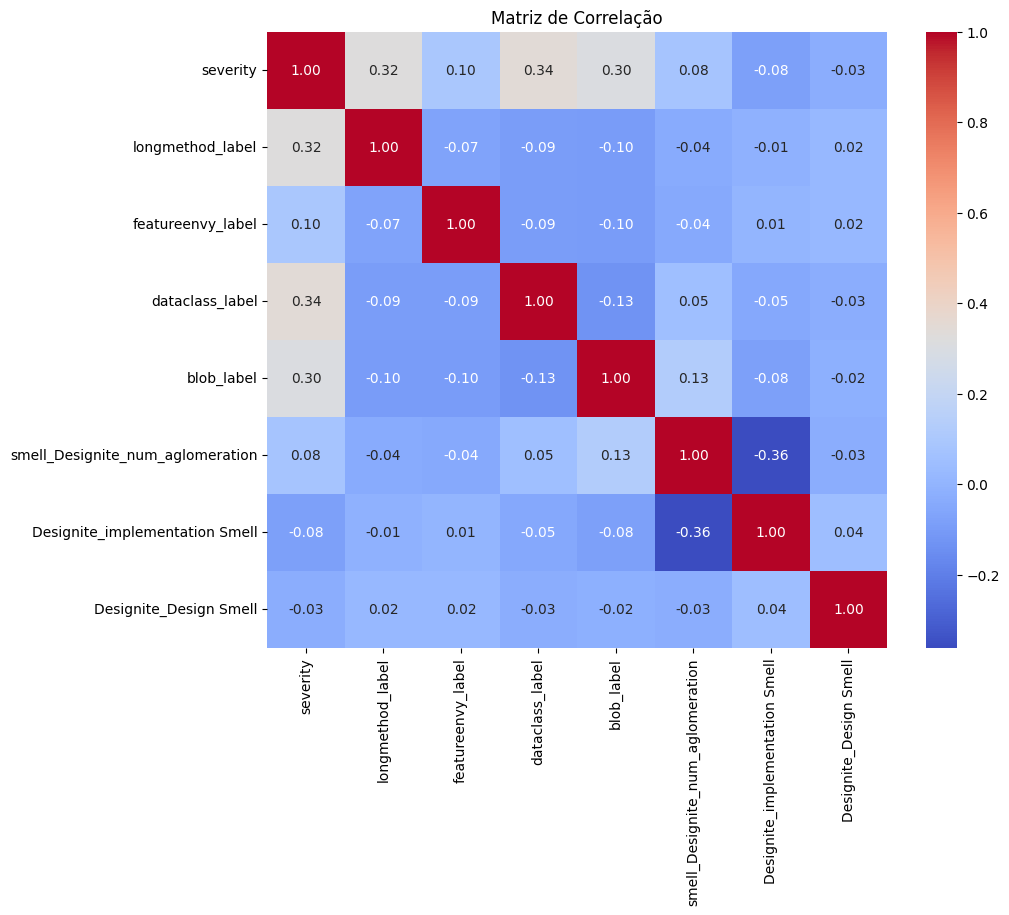

In [149]:
# Convert string column to numerical representation using label encoding
label_encoder = LabelEncoder()
df_corr['Designite_implementation Smell'] = label_encoder.fit_transform(df_corr['Designite_implementation Smell'])
df_corr['Designite_Design Smell'] = label_encoder.fit_transform(df_corr['Designite_Design Smell'])

# Compute the correlation between the integer column and the encoded string column
# Calcular a correlação entre os campos
correlation_matrix = df_corr.corr()

# # # Cria o mapa de calor usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()



###Tem que verificar quais desses campos sao valores unicos e nao string

In [222]:
df_correlation = df_result[['Organic_NumberOfAccessorMethods',
       'Organic_ClassEffectiveLinesOfCode', 'Organic_LCOM3',
       'Organic_TightClassCohesion', 'Organic_IsAbstract',
       'Organic_PublicFieldCount', 'Organic_OverrideRatio',
       'Organic_WeightedMethodCount', 'smell_Organic',
       'Organic_smellReason', 'Organic_ChangingMethods',
       'Organic_NumberOfTryStatements', 'Organic_MaxNesting',
       'Organic_NumberOfFinallyStatements',
       'Organic_NumberOfThrowStatements',
       'Organic_NumberOfTryStatementsWithNoCatchAndFinally',
       'Organic_CyclomaticComplexity', 'Organic_CouplingIntensity',
       'Organic_NumberOfAccessedVariables',
       'Organic_MethodEffectiveLinesOfCode', 'Organic_CouplingDispersion',
       'Organic_ExceptionalLOC', 'Organic_NumberOfDummyExceptionHandlers',
       'Organic_ParameterCount', 'Organic_ChangingClasses',
       'Organic_MaxCallChain', 'Organic_NumberOfCatchStatements',
       'Organic_ThrownExceptionTypesCount', 'CK_Class_type', 'CK_Class_cbo',
       'CK_Class_cboModified', 'CK_Class_fanin', 'CK_Class_fanout',
       'CK_Class_wmc', 'CK_Class_dit', 'CK_Class_noc', 'CK_Class_rfc',
       'CK_Class_lcom', 'lCK_Class_com*', 'CK_Class_tcc', 'CK_Class_lcc',
       'CK_Class_totalMethodsQty', 'CK_Class_staticMethodsQty',
       'CK_Class_publicMethodsQty', 'CK_Class_privateMethodsQty',
       'CK_Class_protectedMethodsQty', 'CK_Class_defaultMethodsQty',
       'CK_Class_visibleMethodsQty', 'CK_Class_abstractMethodsQty',
       'CK_Class_finalMethodsQty', 'CK_Class_synchronizedMethodsQty',
       'CK_Class_totalFieldsQty', 'CK_Class_staticFieldsQty',
       'CK_Class_publicFieldsQty', 'CK_Class_privateFieldsQty',
       'CK_Class_protectedFieldsQty', 'CK_Class_defaultFieldsQty',
       'CK_Class_finalFieldsQty', 'CK_Class_synchronizedFieldsQty',
       'CK_Class_nosi', 'CK_Class_loc', 'CK_Class_returnQty',
       'CK_Class_loopQty', 'CK_Class_comparisonsQty',
       'CK_Class_tryCatchQty', 'CK_Class_parenthesizedExpsQty',
       'CK_Class_stringLiteralsQty', 'CK_Class_numbersQty',
       'CK_Class_assignmentsQty', 'CK_Class_mathOperationsQty',
       'CK_Class_variablesQty', 'CK_Class_maxNestedBlocksQty',
       'CK_Class_anonymousClassesQty', 'CK_Class_innerClassesQty',
       'CK_Class_lambdasQty', 'CK_Class_uniqueWordsQty',
       'CK_Class_modifiers', 'CK_Class_logStatementsQty',
       'CK_Method_file', 'CK_Method_class', 'CK_Method_method',
       'CK_Method_constructor', 'CK_Method_line', 'CK_Method_cbo',
       'CK_Method_cboModified', 'CK_Method_fanin', 'CK_Method_fanout',
       'CK_Method_wmc', 'CK_Method_rfc', 'CK_Method_loc',
       'CK_Method_returnsQty', 'CK_Method_variablesQty',
       'CK_Method_parametersQty', 'CK_Method_methodsInvokedQty',
       'CK_Method_methodsInvokedLocalQty',
       'CK_Method_methodsInvokedIndirectLocalQty', 'CK_Method_loopQty',
       'CK_Method_comparisonsQty', 'CK_Method_tryCatchQty',
       'CK_Method_parenthesizedExpsQty', 'CK_Method_stringLiteralsQty',
       'CK_Method_numbersQty', 'CK_Method_assignmentsQty',
       'CK_Method_mathOperationsQty', 'CK_Method_maxNestedBlocksQty',
       'CK_Method_anonymousClassesQty', 'CK_Method_innerClassesQty',
       'CK_Method_lambdasQty', 'CK_Method_uniqueWordsQty',
       'CK_Method_modifiers', 'CK_Method_logStatementsQty',
       'CK_Method_hasJavaDoc']]


df_correlation.replace(np.nan, 0.5, inplace=True)
df_correlation

<ipython-input-222-da534c16c2ec>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correlation.replace(np.nan, 0.5, inplace=True)


,Organic_NumberOfAccessorMethods,Organic_ClassEffectiveLinesOfCode,Organic_LCOM3,Organic_TightClassCohesion,Organic_IsAbstract,Organic_PublicFieldCount,Organic_OverrideRatio,Organic_WeightedMethodCount,smell_Organic,Organic_smellReason,...,Organic_NumberOfAccessedVariables,Organic_MethodEffectiveLinesOfCode,Organic_CouplingDispersion,Organic_ExceptionalLOC,Organic_NumberOfDummyExceptionHandlers,Organic_ParameterCount,Organic_ChangingClasses,Organic_MaxCallChain,Organic_NumberOfCatchStatements,Organic_ThrownExceptionTypesCount
0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17828,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
17829,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
17830,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
17831,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [227]:
#df_agglomeration = df[['severity', 'smell_Organic_num_aglomeration',
      # 'smell_PMD_num_aglomeration', 'smell_Designite_num_aglomeration']]

# Calcular a correlação entre os campos
corrMatrix = df_correlation.corr()

for i in corrMatrix.index:
    # replace string value with NaN
    #corrMatrix.replace(np.nan, 0.5, inplace=True)
    a = corrMatrix[i].values
    #print((np.mean(a)))
    if (np.mean(a) < 0.5):
      # Remove three columns as index base
      corrMatrix.drop([i], axis=1, inplace=True)

corrMatrix
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

ValueError: could not convert string to float: '[1, 85, 0]'

In [ ]:
df_sum = df_result[['cluster_kmeans_All',
       'cluster_Gaussian_All', 'cluster_kmeans_LOC',
       'cluster_Gaussian_LOC', 'smell_Designite',
       'smell_Organic_aglomeration', 'smell_PMD_aglomeration',
       'smell_Designite_aglomeration', 'smell_Organic_num_aglomeration',
       'smell_PMD_num_aglomeration', 'smell_Designite_num_aglomeration',
       'smell_Organic_longmethod', 'smell_Organic_featureenvy',
       'smell_Organic_dataclass', 'smell_Organic_blob',
       'smell_PMD_longmethod', 'smell_PMD_featureenvy',
       'smell_PMD_dataclass', 'smell_PMD_blob',
       'smell_Designite_longmethod', 'smell_Designite_featureenvy',
       'smell_Designite_dataclass', 'smell_Designite_blob', 'background']]
df_sums = df_sum.groupby(['background'], dropna=False).sum()
df_sums